In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df = df.dropna()

In [5]:
print(df.shape)
print(f'Total number of rows is:{df.shape[0]} and total number of columns is: {df.shape[1]}')

(2200, 8)
Total number of rows is:2200 and total number of columns is: 8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df.duplicated().sum()

0

In [10]:
df['label'].value_counts().reset_index()

,label,count
0,rice,100
1,maize,100
2,jute,100
3,cotton,100
4,coconut,100
5,papaya,100
6,orange,100
7,apple,100
8,muskmelon,100
9,watermelon,100


In [12]:
X = df.drop(columns=['label'])
y = df['label']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.9932


In [17]:
sample_data = pd.DataFrame({
    'N': [90],
    'P': [42],
    'K': [43],
    'temperature': [20.87974371],
    'humidity': [82.00274423],
    'ph': [6.502985292000001],
    'rainfall': [202.9355362]
})

In [18]:
sample_data_scaled = scaler.transform(sample_data)

In [19]:
probabilities = model.predict_proba(sample_data_scaled)

In [20]:
top_3_indices = probabilities.argsort()[0][-3:][::-1]
top_3_crops = model.classes_[top_3_indices]

In [21]:
print("Top 3 crop recommendations:", top_3_crops)

Top 3 crop recommendations: ['rice' 'jute' 'watermelon']


In [23]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.0/532.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 14.0 MB/s eta 0:00:0000:0100:01


Type of shap_values: <class 'numpy.ndarray'>
Shape of shap_values: (1760, 7, 22)
Plotting for class 0


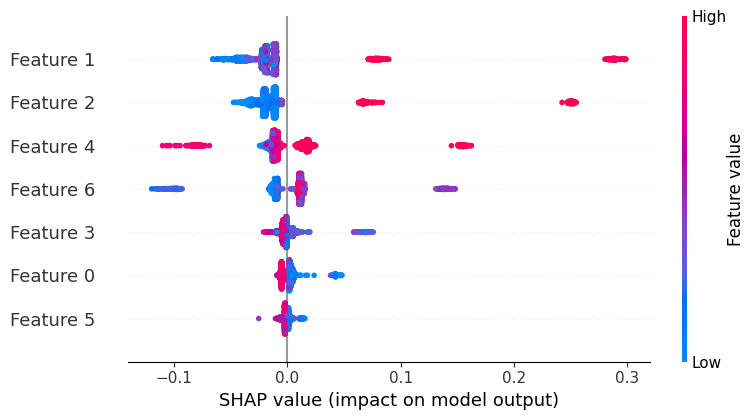

Plotting for class 1


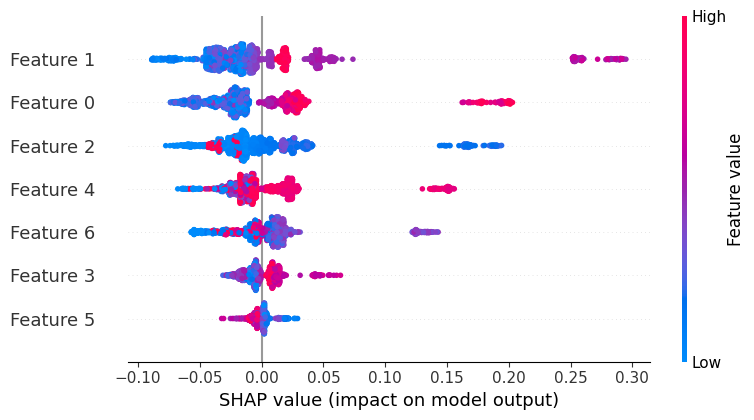

Plotting for class 2


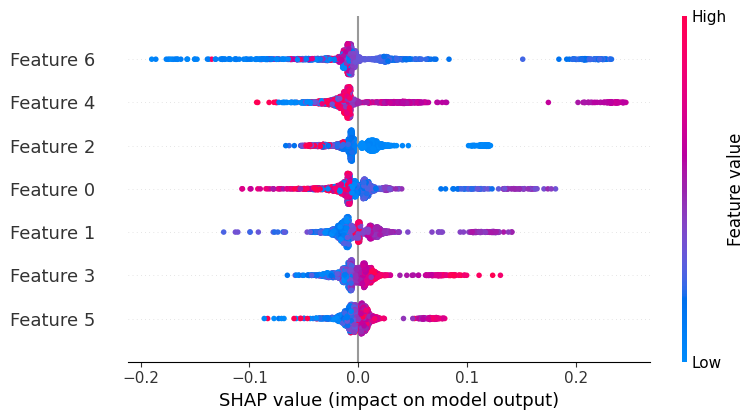

Plotting for class 3


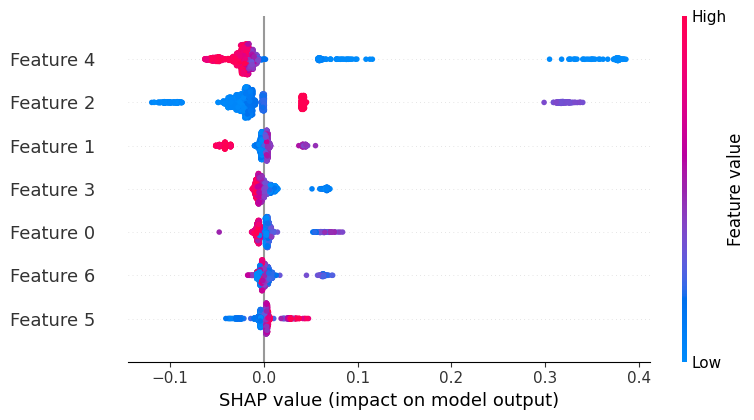

Plotting for class 4


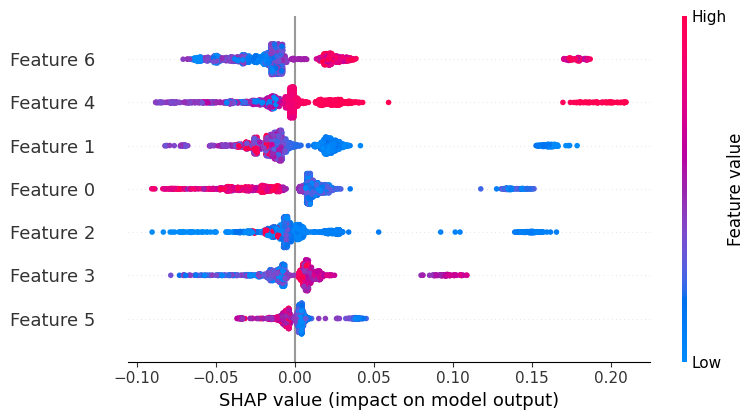

Plotting for class 5


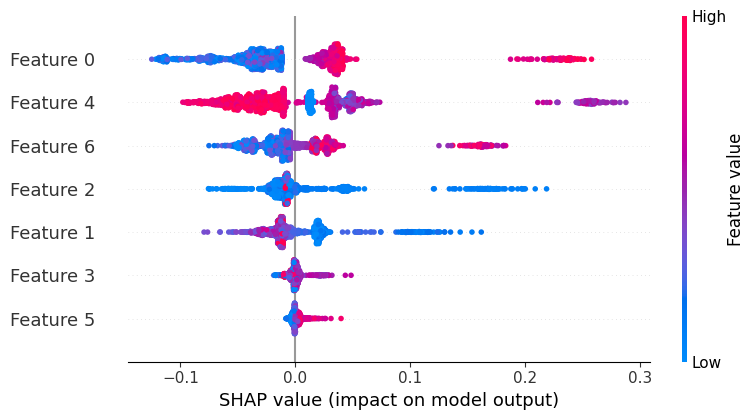

Plotting for class 6


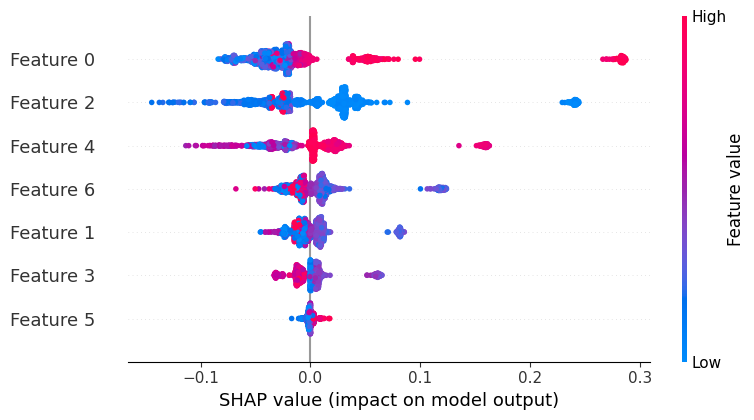

Plotting for class 7


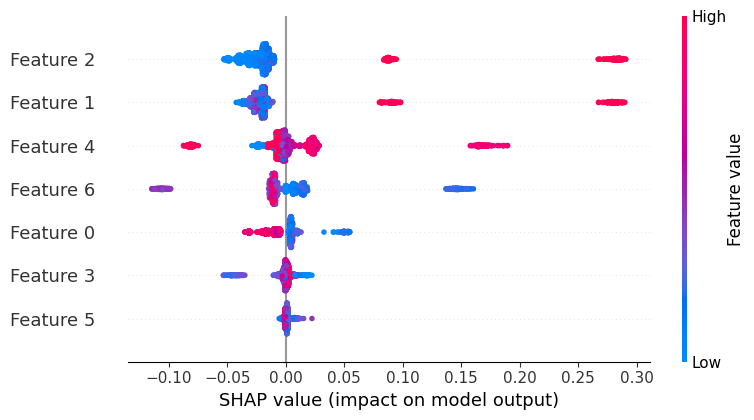

Plotting for class 8


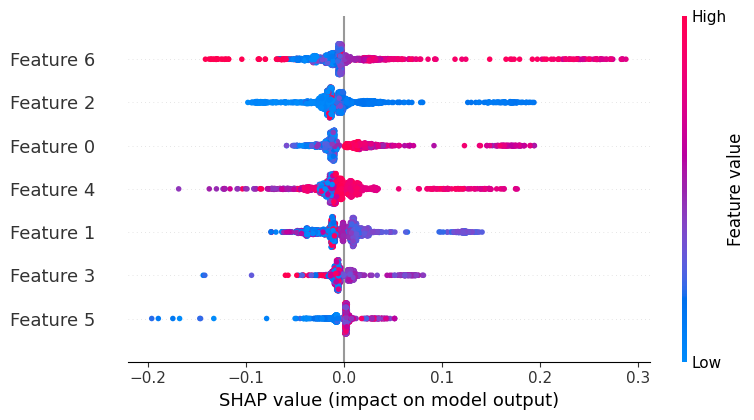

Plotting for class 9


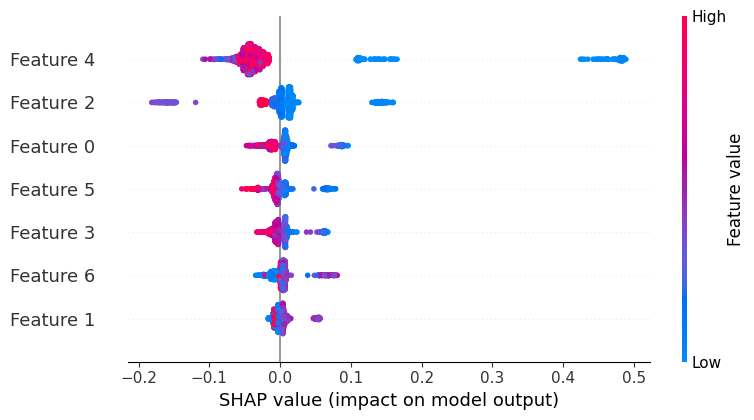

Plotting for class 10


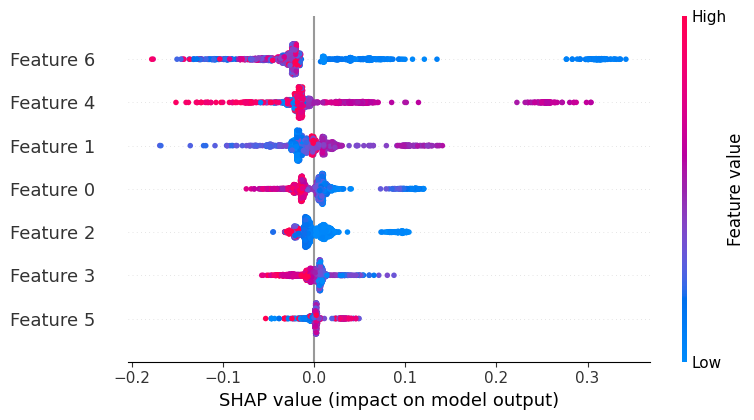

Plotting for class 11


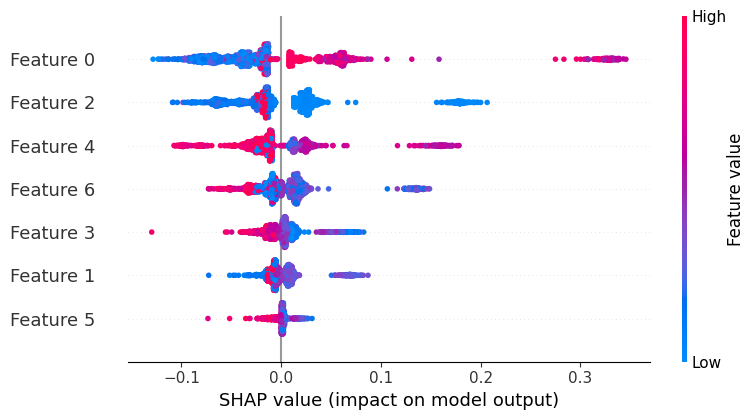

Plotting for class 12


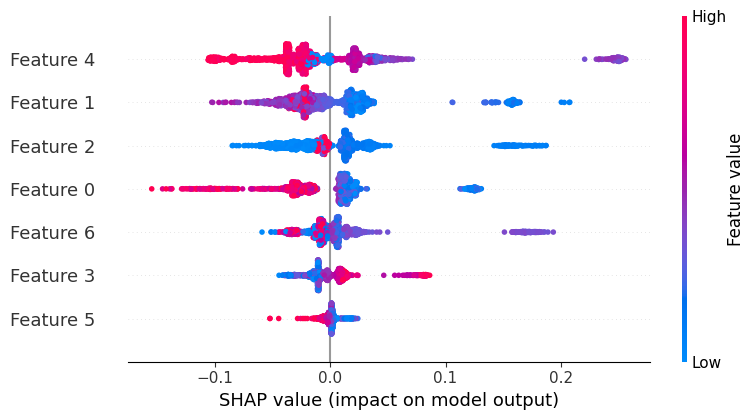

Plotting for class 13


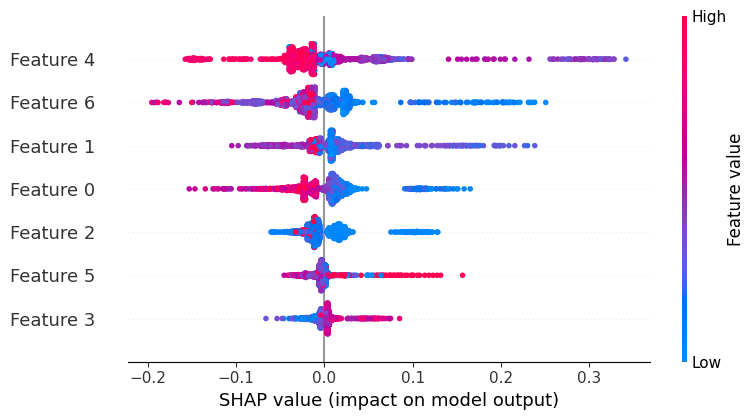

Plotting for class 14


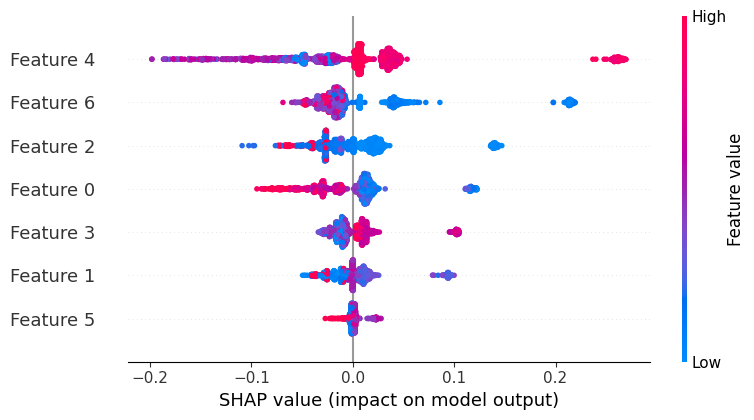

Plotting for class 15


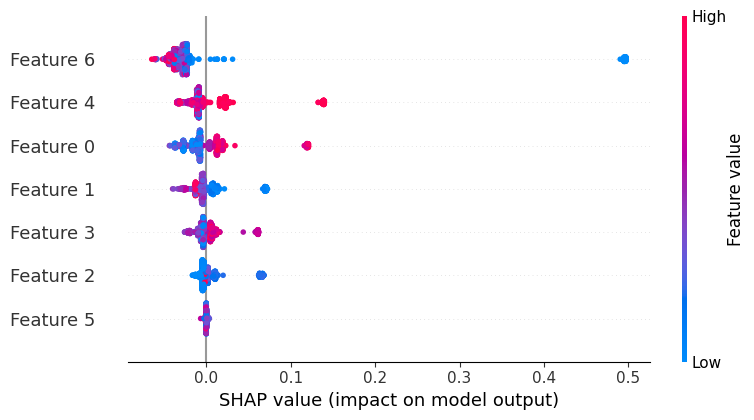

Plotting for class 16


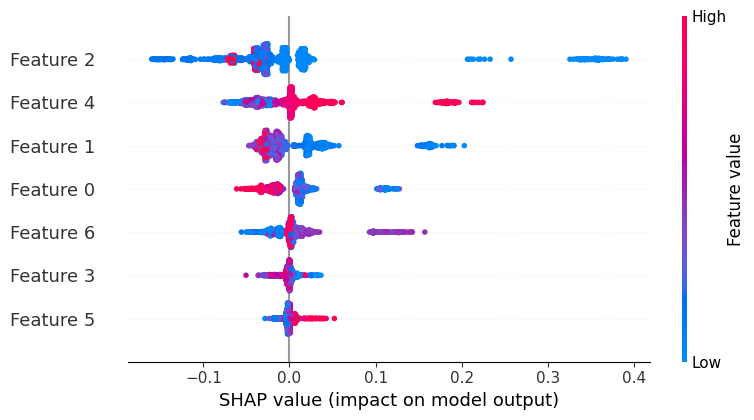

Plotting for class 17


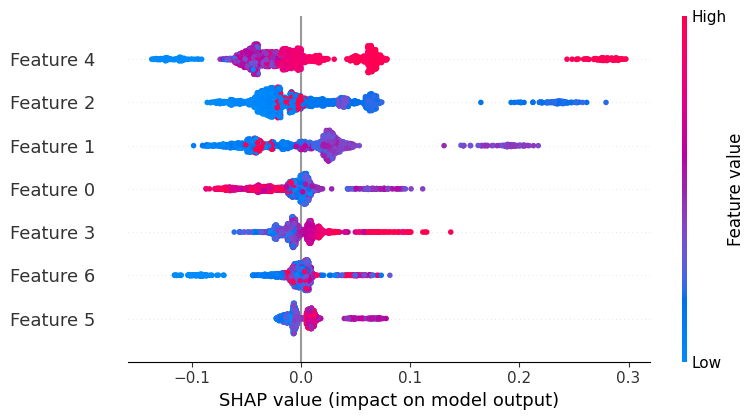

Plotting for class 18


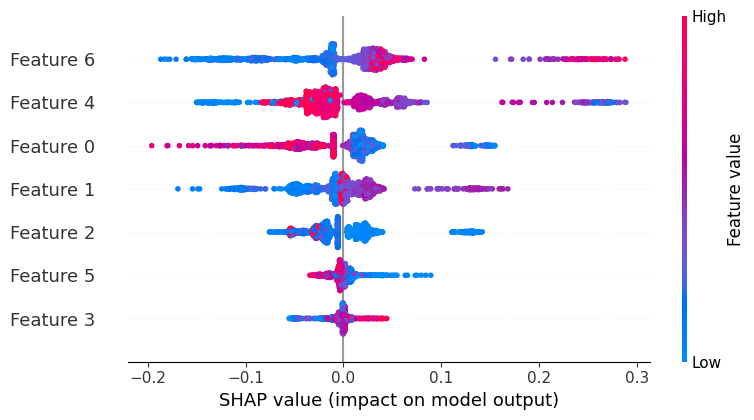

Plotting for class 19


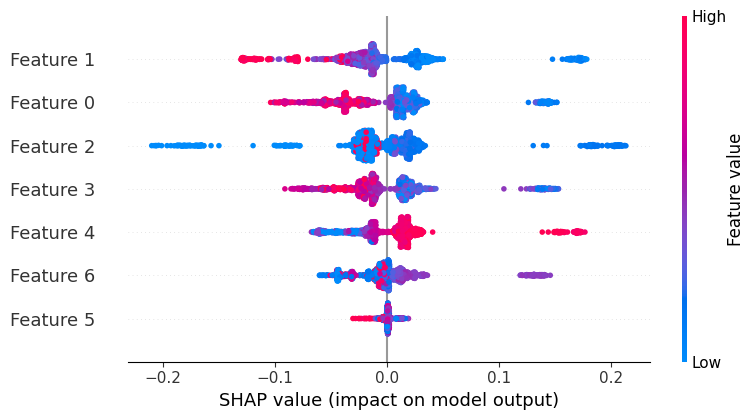

Plotting for class 20


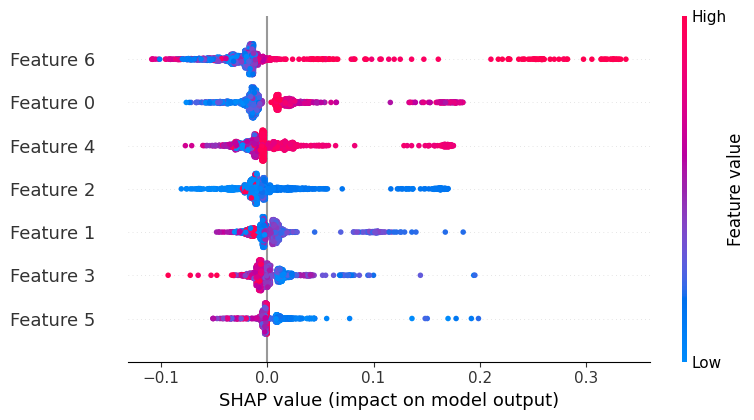

Plotting for class 21


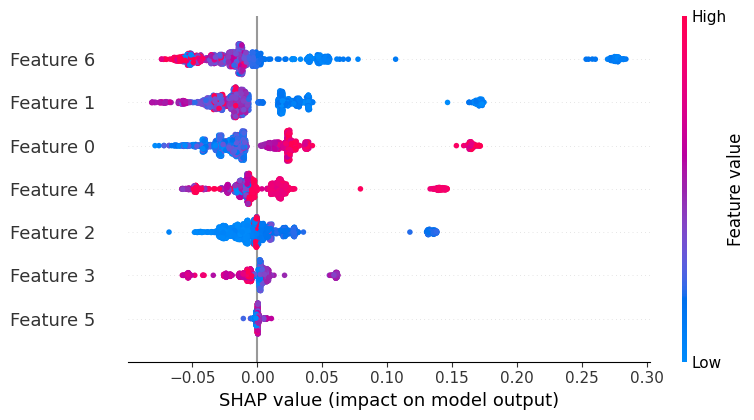

In [38]:
import shap

# SHAP explainer for tree-based models (Random Forest)
explainer = shap.TreeExplainer(model)

# Get the SHAP values for each class (multi-class classification)
shap_values = explainer.shap_values(X_train)

# Print the shape of shap_values to debug
print(f"Type of shap_values: {type(shap_values)}")
print(f"Shape of shap_values: {shap_values.shape}")

# Choose the SHAP values for the first class (or any other class you prefer)
shap_values_class_0 = shap_values[:, :, 0]  # For the first class (index 0)

# Visualize SHAP summary plot for the first class
for i in range(shap_values.shape[2]):  # Loop through all classes
    shap_values_class_i = shap_values[:, :, i]  # SHAP values for the i-th class
    print(f"Plotting for class {i}")
    shap.summary_plot(shap_values_class_i, X_train)


In [31]:
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [32]:
# Check the shape of shap_values and X_train
print(f"Shape of shap_values[0]: {shap_values[0].shape}")
print(f"Shape of X_train: {X_train.shape}")


Shape of shap_values[0]: (7, 22)
Shape of X_train: (1760, 7)


Shape of shap_values[0]: (7, 22)
Shape of sample_data_scaled: (1, 7)


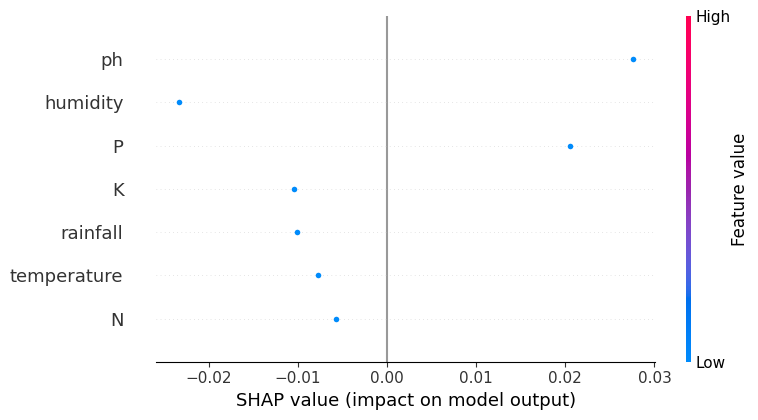

Top 3 Indices: [20  8 21]


In [47]:
import shap
import numpy as np

# Step 1: Get SHAP values for the input sample
explainer = shap.TreeExplainer(model)  # Using TreeExplainer for RandomForest
shap_values = explainer.shap_values(sample_data_scaled)

# Inspect the shape (for debugging)
print("Shape of shap_values[0]:", shap_values[0].shape)  # Expected: (7, 22)
print("Shape of sample_data_scaled:", sample_data_scaled.shape)  # Expected: (1, 7)

# Step 2: Remove the extra columns (assumed to be constant offsets) to match the 7 features.
# Here, we slice the second dimension to keep only the first 7 columns.
shap_values_clean = shap_values[0][:, :7]  # Now shap_values_clean has shape (7, 7)

# Step 3: Visualize SHAP values for the first class.
shap.initjs()  # Initialize JS for visualizations (if using Jupyter)

# IMPORTANT: Instead of extracting a row as a 1D vector, extract it as a 2D matrix:
top_class_shap_values = shap_values_clean[0:1, :]  # Now shape is (1, 7)

# Visualize the SHAP values for the first class (top predicted class)
shap.summary_plot(top_class_shap_values, sample_data_scaled, feature_names=sample_data.columns)

# (Optional) Step 4: Visualize SHAP values for the top 3 recommended crops if needed.

# Check the indices for the top 3 recommended crops
print("Top 3 Indices:", top_3_indices)  # Debugging line
valid_top_3_indices = [idx for idx in top_3_indices if idx < len(top_3_crops)]

# Now, loop over the valid indices only
for idx in valid_top_3_indices:
    print(f"Explaining the recommendation for: {top_3_crops[idx]}")
    
    # Extract the SHAP values for the specific class as a 2D matrix.
    class_shap_values = np.atleast_2d(shap_values_clean[idx])
    print("Shape of class_shap_values:", class_shap_values.shape)  # Debugging line
    
    shap.summary_plot(class_shap_values, sample_data_scaled, feature_names=sample_data.columns)

In [42]:
import shap
import numpy as np

# Step 1: Get SHAP values for the input sample
explainer = shap.TreeExplainer(model)  # Using TreeExplainer for RandomForest
shap_values = explainer.shap_values(sample_data_scaled)

# Inspect the shape of shap_values and the input data
print(f"Type of shap_values: {type(shap_values)}")
print(f"Shape of shap_values: {len(shap_values)} classes")
for i, class_shap_values in enumerate(shap_values):
    print(f"Shape of shap_values for class {i}: {class_shap_values.shape}")

# Inspect the shape of sample_data_scaled to compare
print(f"Shape of sample_data_scaled: {sample_data_scaled.shape}")

Type of shap_values: <class 'numpy.ndarray'>
Shape of shap_values: 1 classes
Shape of shap_values for class 0: (7, 22)
Shape of sample_data_scaled: (1, 7)


In [48]:
import joblib

# Save the trained model
joblib.dump(model, 'crop_recommendation_model.pkl')

['crop_recommendation_model.pkl']